# Pseudo-Labeling.
### Set alpha as a constant to check variation through random seeds model with batch=30 and epoch=10

![picture](https://drive.google.com/uc?export=view&id=110jVcT6fP54QyEWP6YtPlM0S-f1K3fBg)

## META DEL NOTEBOOK: COMPARAR RESULTADO DE LA MEDIA DE 4 SEEDS EN ALPHA DINAMICO Y ESTATICO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns

## DYNAMIC SEEDS: Alpha changes in the batch.
![picture](https://drive.google.com/uc?export=view&id=1Cgd3dBt1ODoVqK7uuuziJ6V_9b4G9BGx)


### Step<100//////Alpha=0
### Step=>100  and step<600//////Alpha=Formula, where t=steps; T2=train_size/batch_size;  T1=T2/6
### Step >=600//////Alpha=3
 

In [3]:
path="/content/drive/MyDrive/Datos Projecte/Dynamic_to_seed_V2/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

['Seed_Dynamic_101.csv', 'Seed_Dynamic_5.csv', 'Seed_Dynamic_6.csv', 'Seed_Dynamic_7.csv', 'Seed_Dynamic_3.csv', 'Seed_Dynamic_4.csv', 'Seed_Dynamic_1.csv', 'Seed_Dynamic_2.csv']


In [4]:
def Create_dataframe(Seed_list, path):
  i=0
  for files in Seed_list:
      if i==0:
        data=pd.read_csv(path+files) 
        dt=data["AUC"]
        #dt= pd.concat([pd_alpha, pd_auc], axis=1)
        i=i+1
      else:
        i=i+1
        data=pd.read_csv(path+files) 
        pd_h=data["AUC"]
        if dt.shape[0]==pd_h.shape[0]:
          dt= pd.concat([dt, pd_h], axis=1)
  dt["mean"]=dt.mean(axis=1)
  dt["std"]=dt.iloc[:,0:-2].std(axis=1)
  number_seeds=i+1
  return dt,number_seeds

In [5]:
dt,number_seeds=Create_dataframe(onlyfiles,path)
print(dt)

print("La media es: "+str(dt["mean"][0]))
print("El std es: "+str(dt["std"][0]))
mean_dynamic=dt["mean"][0]
#max_value = dt.idmax()
#print(max_value)

        AUC       AUC       AUC       AUC      AUC       AUC       AUC  \
0  0.781573  0.808475  0.793228  0.770557  0.80402  0.790149  0.791046   

        AUC      mean       std  
0  0.796114  0.791895  0.012824  
La media es: 0.7918951878927621
El std es: 0.012824489976468612


#### MEAN=0.7953321693467237

#### STD=0.006539005273026549

# STATIC SEEDS, ALPHA IS STATIC FOR ALL THE STEPS

In [6]:
path="/content/drive/MyDrive/Datos Projecte/Static_to_seed_V2/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

['Seed_static_alpha_1.csv', 'Seed_static_alpha_101.csv', 'Seed_static_alpha_2.csv', 'Seed_static_alpha_3.csv', 'Seed_static_alpha_4.csv', 'Seed_static_alpha_5.csv', 'Seed_static_alpha_6.csv', 'Seed_static_alpha_7.csv']


In [7]:
def Plot_all(Seed_list,path):
  plt.figure(figsize=(10,5))
  font1 = {'family':'serif','color':'black','size':20}
  font2 = {'family':'serif','color':'darkred','size':15}
  plt.title("AUC/Alpha for Pseudolabels",fontdict = font1)
  plt.xlabel("Alpha",fontdict = font2)
  plt.ylabel("AUC",fontdict = font2)
  plt.grid()
  for files in Seed_list:
    data=pd.read_csv(path+files)  
    plt.xticks(np.arange(min(data["Alpha"]), max(data["Alpha"]),1))
    plt.plot(data["Alpha"], data["AUC"], label='Seed: '+str(data["Seed"][0]),marker='o',markersize=3, linewidth=4, alpha=0.7)
  plt.legend()


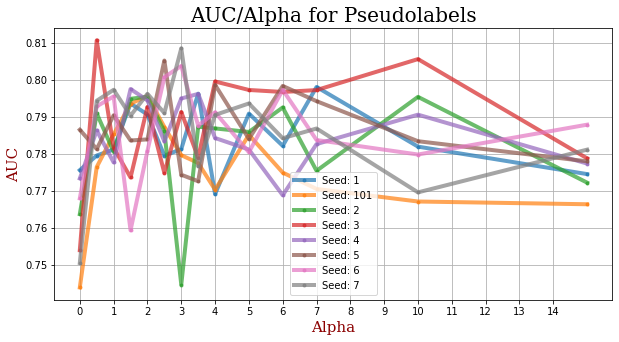

In [8]:
Plot_all(onlyfiles,path)

In [9]:
def Create_dataframe(Seed_list, path):
  i=0
  for files in Seed_list:
      if i==0:
        data=pd.read_csv(path+files) 
        pd_alpha=data["Alpha"]
        pd_auc=data["AUC"]
        dt= pd.concat([pd_alpha, pd_auc], axis=1)
        i=i+1
      else:
        i=i+1
        data=pd.read_csv(path+files) 
        pd_h=data["AUC"]
        if dt.shape[0]==pd_h.shape[0]:
          dt= pd.concat([dt, pd_h], axis=1)
  dt["mean"]=dt.iloc[:,1:].mean(axis=1)
  dt["std"]=dt.iloc[:,1:-2].std(axis=1)
  number_seeds=i+1
  return dt,number_seeds

In [10]:
dt,number_seeds=Create_dataframe(onlyfiles,path)
print(dt)

    Alpha       AUC       AUC       AUC       AUC       AUC       AUC  \
0     0.0  0.775615  0.743874  0.763713  0.753937  0.773359  0.786544   
1     0.5  0.779567  0.776448  0.790966  0.810728  0.786341  0.781329   
2     1.0  0.781203  0.785278  0.780586  0.781719  0.777701  0.790449   
3     1.5  0.793641  0.793588  0.794921  0.773622  0.797556  0.783638   
4     2.0  0.790662  0.795687  0.795460  0.792728  0.794494  0.783932   
5     2.5  0.779527  0.787300  0.786111  0.774842  0.783385  0.805270   
6     3.0  0.781299  0.779660  0.744660  0.791342  0.794997  0.774369   
7     3.5  0.796307  0.777554  0.787380  0.779020  0.796240  0.772606   
8     4.0  0.769124  0.770314  0.786897  0.799599  0.784305  0.798686   
9     5.0  0.790916  0.785158  0.785944  0.797303  0.781189  0.784065   
10    6.0  0.782192  0.774955  0.792568  0.796760  0.768818  0.798393   
11    7.0  0.798113  0.770530  0.775442  0.797276  0.782665  0.794274   
12   10.0  0.781972  0.767125  0.795437  0.805656  

<function matplotlib.pyplot.show>

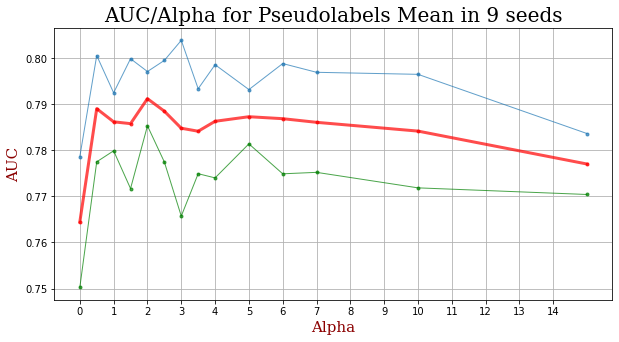

In [11]:
plt.figure(figsize=(10,5))
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("AUC/Alpha for Pseudolabels Mean in "+str(number_seeds)+" seeds",fontdict = font1)
plt.xlabel("Alpha",fontdict = font2)
plt.ylabel("AUC",fontdict = font2)
plt.grid()
plt.xticks(np.arange(min(dt["Alpha"]), max(dt["Alpha"]),1))
plt.plot(dt["Alpha"], dt["mean"], label='Mean',marker='o',markersize=3, linewidth=3, alpha=0.7,color="red")
plt.plot(dt["Alpha"], (dt["mean"]-dt["std"]), label='Mean+STD',marker='o',markersize=3, linewidth=1, alpha=0.7,color="green")
plt.plot(dt["Alpha"], (dt["mean"]+dt["std"]), label='Mean+STD',marker='o',markersize=3, linewidth=1, alpha=0.7)
plt.show

In [12]:
max_value = dt["mean"].max()
id_max=dt["mean"].idxmax()
alpha_max=dt["Alpha"].iloc[id_max]

print("La media máxima es: "+str(max_value))
print("El alpha donde es máximo "+str(alpha_max))
print("El std es: "+str(dt["std"].iloc[id_max]))


La media máxima es: 0.791258771549857
El alpha donde es máximo 2.0
El std es: 0.005898887072904188


## El valor de la media máximo lo encontramos en alpha=10 y es de 0.79342

# DYNAMIC SEED MEAN - STATIC SEED MEAN

In [13]:
diff_mean=mean_dynamic-max_value
print("La diferencia entre Seed dinamica y estatica es: "+str(diff_mean))
print("La seed dinamica es ligeramente superior a la estatica")

La diferencia entre Seed dinamica y estatica es: 0.0006364163429051217
La seed dinamica es ligeramente superior a la estatica



### Menor que aplicando alpha dinámico, con una diferencia de: 0.001910082034400018

#WHEN ALPHA=0 it's like no pseudolabeling is applyed, so compering the results of Alpha=0 to Alpha dynamic will show the difference between applying Psuedo-labelig and not 

In [14]:
print("La media with no pseudolabeling es: "+str(dt["mean"].iloc[0]))
print("El std es: "+str(dt["std"].iloc[0]))

La media with no pseudolabeling es: 0.7644405700424499
El std es: 0.014210304487129054


# DYNAMIC SEED MEAN - NO PSEUDOLABELING

In [16]:
diff_mean=mean_dynamic-(dt["mean"].iloc[0])
print("La diferencia entre Seed dinamica y estatica es: "+str(diff_mean))
print("La seed dinamica es superior a la estatica, "+str(diff_mean*100)+"%")

La diferencia entre Seed dinamica y estatica es: 0.027454617850312224
La seed dinamica es superior a la estatica, 2.7454617850312224%
